<a href="https://colab.research.google.com/github/leehanchung/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [56]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
mean_sales = sum(sales)/len(sales)
print("Mean: {}".format(mean_sales))
var_sales = sum((sale - mean_sales) ** 2 for sale in sales) / len(sales)
print("Var: {}".format(var_sales))
std_sales = var_sales ** (1/2)
print("STD: {}".format(std_sales))

Mean: 3052.714285714286
Var: 183761.06122448976
STD: 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [57]:
customers = [127, 80, 105, 92, 120, 115, 93]
customers_np = np.array(customers)
sales_np = np.array(sales)
np.cov(sales_np, customers_np)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

Sample correlation coefficient is:

$$r = \frac{1}{n-1} \sum\big(\frac{X-\bar{X}}{S_x}\big)\big(\frac{Y-\bar{Y}}{S_y}\big)$$

Using population correlation coefficient for calculation for sanity.

In [59]:
mean_customers = sum(customers)/len(customers)
print("Mean: {}".format(mean_customers))
var_customers = sum((customer - mean_customers) ** 2 for customer in customers) / len(customers)
print("Var: {}".format(var_customers))
std_customers = var_customers ** (1/2)
print("STD: {}".format(std_customers))

coeff = sum([(s-mean_sales)*(c-mean_customers)/std_sales/std_customers for s, c in zip(sales, customers)])/len(sales)
print("Correlation coefficient: {}".format(coeff))
print("Correlation coefficient sanity check: {}".format(np.corrcoef(customers_np, sales_np)[1, 0]))

Mean: 104.57142857142857
Var: 249.3877551020408
STD: 15.792015549069118
Correlation coefficient: 0.962833977814891
Correlation coefficient sanity check: 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [5]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
df = pd.read_csv(url)
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

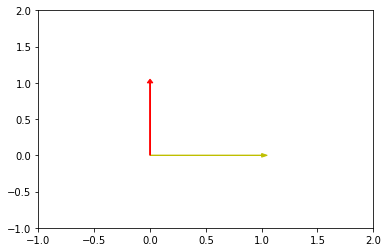

In [6]:
# perpendicular.
i = np.array([1, 0])
j = np.array([0, 1])
fig = plt.figure()
#ax.arrowplot(i, j)
ax = fig.gca()# = fig.add_subplot(111)#, projection='3d')
ax.arrow(0, 0, i[0], i[1], head_width=.05, head_length=0.05, color = 'y')
ax.arrow(0, 0, j[0], j[1], head_width=.05, head_length=.05, color = 'r')
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
plt.show();

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [7]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
if a.dot(b) == 0:
    print("Orthogonal because dot product equals 0.")
else:
    print("Not orthogonal because dot product does not equal to 0.")

Not orthogonal because dot product does not equal to 0.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [8]:
c = np.array([2, -15, 6, 20])
print("||c||^2 = {}.".format(np.linalg.norm(c)**2))
print(c.dot(c))
print(c.T.dot(c))
print("They are all the same.  The norm of a vector is the same as its dot product,")
print("which is the are covered by the transformation")

||c||^2 = 665.0.
665
665
They are all the same.  The norm of a vector is the same as its dot product,
which is the are covered by the transformation


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7\vec{i} + 12\vec{j}$

$e = 2\vec{i} + 11\vec{j} - 8\vec{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [9]:
f = np.array([4, 12, 11, 9, 2])
f_norm = f / np.linalg.norm(f)
print(f_norm)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

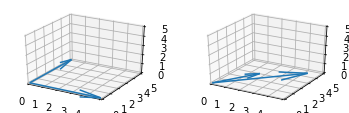

In [10]:
v1 = np.array([5, 0, 0])
v2 = np.array([0, 5, 0])
v3 = np.array([5, 3, 0])
v4 = np.array([2.5, 1.5, 0])

fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2])
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2])
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 5)

ax2 = fig.add_subplot(222, projection='3d')
ax2.quiver(0, 0, 0, v3[0], v3[1], v3[2])
ax2.quiver(0, 0, 0, v4[0], v4[1], v4[2])
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)
ax2.set_zlim(0, 5)

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}


$$g = \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} g \\ 2g \end{bmatrix}$$

$$h = \begin{bmatrix}4\\8\end{bmatrix} = 4g$$

So the span of the vectors $\vec{g}$ and $\vec{h}$ is $y = 2x \in \mathbb{R}^2$



## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

$$\begin{bmatrix} 1 && 2 && 3 \\ -1 && 0 && 7 \\4 && 8 && 2\end{bmatrix} \rightarrow  \begin{bmatrix}1 && 2 && 3 \\ 0 && 2 && 10 \\0 && 0 && -10\end{bmatrix}\rightarrow  \begin{bmatrix}1 && 2 && 3 \\ 0  && 1 && 5 \\0 && 0 && 1\end{bmatrix}$$

The row echelon form of the vectors indicates that all three of them are linearly independent from each other, thus {l, m, n} spans $\mathbb{R}^3$


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



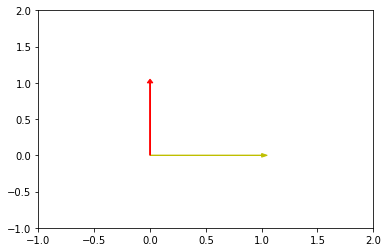

In [12]:
i = np.array([1, 0])
j = np.array([0, 1])
fig = plt.figure()
#ax.arrowplot(i, j)
ax = fig.gca()# = fig.add_subplot(111)#, projection='3d')
ax.arrow(0, 0, i[0], i[1], head_width=.05, head_length=0.05, color = 'y')
ax.arrow(0, 0, j[0], j[1], head_width=.05, head_length=.05, color = 'r')
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
plt.show();

## 6.2 What does it mean to form a basis?

1) linearly independent, and 2) spans the whole vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

\begin{align}
\begin{bmatrix} 1 & 2 & 3 \\  -1 & 0 & 7 \\ 4 & 8  & 2\end{bmatrix} \rightarrow
\begin{bmatrix} 1 & 2 & 3 \\  -1 & 0 & 7 \\ 0 & 0  & -10\end{bmatrix} \rightarrow
\begin{bmatrix} 1 & 2 & 3 \\  0 & 1 & 5 \\ 0 & 0  & -1\end{bmatrix}
\end{align}

Rank 3

In [22]:
p = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The maximum number of linearly independent matrices.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

From [wikipedia](https://en.wikipedia.org/wiki/Vector_projection), 
 the definition of the vector projection of a onto b becomes

${\displaystyle \mathbf {a} _{1}=a_{1}\mathbf {\hat {b}} ={\frac {\mathbf {a} \cdot \mathbf {b} }{\left\|\mathbf {b} \right\|}}{\frac {\mathbf {b} }{\left\|\mathbf {b} \right\|}},} {\displaystyle \mathbf {a} _{1}=a_{1}\mathbf {\hat {b}} ={\frac {\mathbf {a} \cdot \mathbf {b} }{\left\|\mathbf {b} \right\|}}{\frac {\mathbf {b} }{\left\|\mathbf {b} \right\|}},}$
which is equivalent to either

${\displaystyle \mathbf {a} _{1}=(\mathbf {a} \cdot \mathbf {\hat {b}} )\mathbf {\hat {b}} ,} \mathbf {a} _{1}=(\mathbf {a} \cdot \mathbf {\hat {b}} )\mathbf {\hat {b}} ,$

[0.5 1.5]


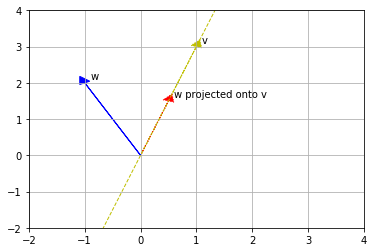

In [46]:
v = np.array([1, 3])
w = np.array([-1, 2])
v_hat = v / np.linalg.norm(v)
w_1 = np.dot(w, v_hat) * v_hat
v_line = np.linspace(-2, 4)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)
ax.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, color = 'y', ls=":")
ax.text(v[0]+0.1, v[1]+0.1, "v")
ax.arrow(0, 0, w_1[0], w_1[1], head_width=0.2, head_length=0.2, color = 'r', ls=":")
ax.text(w_1[0]+0.1, w_1[1]+0.1, "w projected onto v")
ax.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2, color = 'b')
ax.text(w[0]+0.1, w[1]+0.1, "w")
#plot L
x_vals = np.array(ax.get_xlim())
y_vals = 3*x_vals
plt.plot(x_vals, y_vals, '--', color='y', linewidth=1)
ax.grid()
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

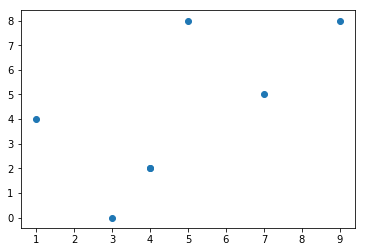

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()